In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [141]:
def plot_decision_boundary(pred_func): 
    # Set min and max values and give it some padding 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    h = 0.01 
    # Generate a grid of points with distance h between them 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    # Predict the function value for the whole gid 
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 
    # Plot the contour and training examples 
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral) 

# Applying logisitc regression and SVM


Below is a quick refresher on classifiers using KNN:

In [59]:
newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()

X_news = newsgroups['data']
y_news = newsgroups['target']

X_news.shape, y_news.shape

((11314, 130107), (11314,))

In [142]:
X_train, X_valid, y_train, y_valid = train_test_split(X_news, y_news, test_size = 0.2, random_state = 0)

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

knn_model.score(X_valid, y_valid)

0.6858152894387981

Using logisitic regression:

In [143]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_valid, y_valid)

C:\Users\Dillon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7808219178082192

Logistic Regression also allows us to view confidence intervals for each class. 
- CI is given across all features per sample.

In [62]:
lr_model.predict_proba(X_train[:1])

array([[0.02450943, 0.09637763, 0.03534174, 0.03861702, 0.02956403,
        0.09433779, 0.08854998, 0.02142866, 0.04133822, 0.03083828,
        0.01238473, 0.05345561, 0.05006134, 0.12328024, 0.172922  ,
        0.0108018 , 0.01860563, 0.01264648, 0.01985259, 0.0250868 ]])

And using SVM:

In [63]:
s_model = LinearSVC()
s_model.fit(X_train, y_train)
s_model.score(X_valid, y_valid)

0.901458241272647

Or the SVC only:

In [64]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_model.score(X_valid, y_valid)

0.8188245691559877

# Loss Functions

In sklearn <b>linear classifiers</b> predict by applying the following formula then checking its sign:

    raw_model_output = coefficients@features + intercept (@ = dot)
        If + predict A
        if - predict B

In essence, coefficients model the slope of the boundary and the intercept shifts it. 

In [65]:
breast = sklearn.datasets.load_breast_cancer()

X = breast['data']
y = breast['target']

X.shape, y.shape

((569, 30), (569,))

In [66]:
lr_model = LogisticRegression()
lr_model.fit(X, y)

C:\Users\Dillon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
print(lr_model.predict(X)[10])
print(lr_model.predict(X)[20])

0
1


In [68]:
# Raw model output
print(lr_model.coef_ @ X[10] + lr_model.intercept_)
print(lr_model.coef_ @ X[20] + lr_model.intercept_)

[-6.57470398]
[5.40382589]


Starting at the boundary of the decision classifier the RMO is 0. As we move further away in each direction we either become more positive or negative, thus leading to a prediction.

Loss functions are part of almost all models. Some form of loss needs to be minimised for a model to be as accurate as it can be. Loss can be considered a penalty for doing poorly. 
- Think mean squared error. 

When deciding on a loss function it's important to consider the task at hand. MSE won't work for classifcation as it will output a range of values. We need either a 0 or 1 for binary classification. 
- Classification matrix/report.
- Logistic loss.
- Hinge loss. 

<img src = 'LossDiag.jpg' width = '600' height = '400'>

# Logistic Regression

In the supervised learning course it was shown that regularisation combats overfitting by penalising large coefficients. C (inverse of regularisation strenght) is an argument that can be passed into LogisiticRegression. A higher value of C will result in lower regularistaion. 
 
- L2: Ridge Regression - Weights are kept as small as possible. 
- L1: Lasso Regression - Eliminates unimportant features by completely removing those weights. 

In [69]:
# Comparing C: 
wine = sklearn.datasets.load_wine()

X = wine['data']
y = wine['target']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)

lr_weak = LogisticRegression(C = 100)
lr_strong = LogisticRegression(C = 0.01)

lr_weak.fit(X_train, y_train)
lr_strong.fit(X_train, y_train)

print(f'Weak Reg Training Score: {lr_weak.score(X_train, y_train)}')
print(f'Strong Reg Training Score: {lr_strong.score(X_train, y_train)}')
print(f'Weak Reg Test Score: {lr_weak.score(X_valid, y_valid)}')
print(f'Strong Reg Test Score: {lr_strong.score(X_valid, y_valid)}')


Weak Reg Training Score: 0.9788732394366197
Strong Reg Training Score: 0.9436619718309859
Weak Reg Test Score: 0.9166666666666666
Strong Reg Test Score: 0.9444444444444444


C:\Users\Dillon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dillon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

The model with weak regularisation gets a higher training accuracy. This is because all features are made available for training, and thus the model is prone to overfit. In comparison, the test set from the weaker regularisation model performs worse. It keeps the feature around, but not fully. Any features that drove the model will be taken out. 

C:\Users\Dillon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dillon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

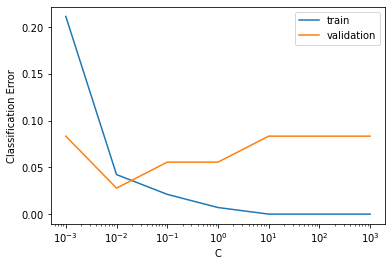

In [70]:
train_errors = []
valid_errors = []

C_value = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

X = wine['data']
y = wine['target']

for c in C_value:
    lr_model = LogisticRegression(max_iter = 1000, C = c)
    lr_model.fit(X_train, y_train)

    train_errors.append(1 - lr_model.score(X_train, y_train))
    valid_errors.append(1 - lr_model.score(X_valid, y_valid))

plt.semilogx(C_value, train_errors, C_value, valid_errors)
plt.xlabel('C')
plt.ylabel('Classification Error')
plt.legend(("train", "validation"))
plt.show()

Logistic Regression can also be used to predict probabilities, as opposed to classified 1s or 0s. The greater the regularisation (small c) the worse our confidence will be. Overconfidence = overfitting. These probabilities can be derived from the raw model output, which needs to be squashed using the sigmoid function.

## Multi-Class Logisitic Regression

Multi-class is used for problems with more than two classes. 
- Can be done by combining multiple binary classifiers.
- Or one-vs-rest.

One thing to think about. If some data, 0, is partially embedded in data, 1, then one-vs-rest will get 0 completely wrong. Support Vector Machines can solve this! (Below)

In [71]:
# One-vs-rest (hard coded)

X = wine['data']
y = wine['target']

lr0 = LogisticRegression()
lr0.fit(X, y==0)

lr1 = LogisticRegression()
lr1.fit(X, y==1)

lr2 = LogisticRegression()
lr2.fit(X, y==2)

# Raw model output - Most confident that lr0 will classify 0. 
lr0.decision_function(X)[0], lr1.decision_function(X)[0], lr2.decision_function(X)[0]

C:\Users\Dillon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dillon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

(5.89106890533225, -5.342393159540837, -7.574977554404708)

In [72]:
# One-vs-rest is sklearn default.
lr_model = LogisticRegression()
lr_model.fit(X, y)

lr_model.predict(X)[0]

C:\Users\Dillon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0

In [73]:
# For direct multiclass: 
lr_mc = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_mc.fit(X, y)

# 3 rows for each class object
lr_mc.coef_.shape, lr_mc.intercept_.shape

C:\Users\Dillon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


((3, 13), (3,))

# Support Vector Machines

SVMs classify based on large margin classification. It aims to stay as far away from data clusters to give as wide a margin as possible. If we think of an SVM as creating a two lane road through the middle of the clusters, then the paths are the support vectors. The decision boundary will remain rigid even when new data is added.

- SVMs are sensitive to scaling. They perform better with scaled data. 

Because of the hard boundary (the street) SVMs are best suited to linearly seperable data. This can be remedied with soft margin classification, which will try to minimise margin violations. 

- LinearSVC has C as a hyperparameter. A lower C will allow for many violations, but a wider margin.

In [137]:
iris = sklearn.datasets.load_iris()

X = iris['data'][:, (2,3)] # petal length, width
y = iris['target'] == 2 # Iris virginica

svm_model = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('model', SVC(C = 1))
])

svm_model.fit(X, y)
svm_model.score(X,y)

0.9533333333333334

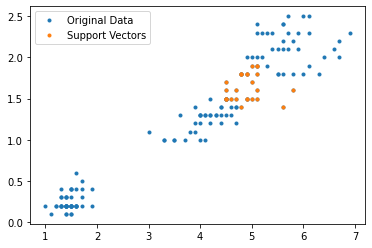

In [138]:
plt.plot(X[:,0], X[:,1], marker = '.', linestyle = 'none', label = 'Original Data')
plt.plot(X_support[:,0], X_support[:,1], marker = '.', linestyle = 'none', label = 'Support Vectors')
plt.plot()
plt.legend()
plt.show()

Text(0.5, 1.0, 'SVM')

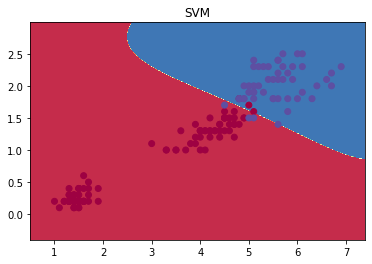

In [146]:
# Plot the decision boundary 
plot_decision_boundary(lambda X: svm_model.predict(X)) 
plt.title("SVM") 

Kernels can be used to fit decision boundaries to non-linear classification problems. It does this by transforming the samples so that they are linearly seperable, fitting the data, then transforming back to the original. 

In [150]:
svm_model = SVC(gamma = 10) # Default kernel is rbf, gamma controls smoothness
svm_model.fit(X, y)
svm_model.score(X,y)

0.96

Text(0.5, 1.0, 'SVC')

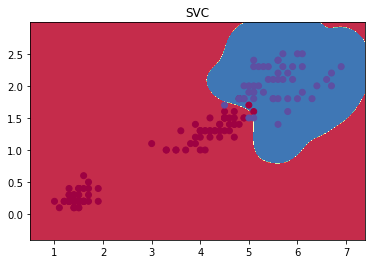

In [151]:
plot_decision_boundary(lambda X: svm_model.predict(X)) 
plt.title("SVC") 

SVMs allow for the use of multiple kernels more efficiently than regression models. Further, the decision boundary is only affected by the support vectors. In LinearRegression, all data affects the boundary and extracting probabilities is easier. 